#Pattern

importing google drive

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving PPH Raw Data.xlsx to PPH Raw Data.xlsx


Installing Libraries

In [ ]:
!pip install pandas
!pip install category_encoders
! pip install -q scikit-plot
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import scikitplot as skplt
import pickle
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb

from scipy import stats

Integrating excel file to dataframe

In [ ]:
# Specify the file name
file_name = "PPH Raw Data.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_name)

# Display the DataFrame
df.head()


,Patient ID,Age,GA,B/U,Gravida,Parity,Children Alive,Past Obst Complications,Abnormalities,Duration of Labour,Delivery method,Est Blood Loss,Perineum,Birth weight,Sex of Baby,HIV Status
0,1,29,37,U,2,1,1,1 previous C/S,1 previous C/S,8h 40 min,NVD,600,Episiotomy,2800g,Boy,0
1,2,17,37,B,1,0,0,nil,nil,20h 35min,NVD,600,Episiotomy,3000g,Boy,0
2,3,20,41,B,1,0,0,nil,Post dates,21h 25min,NVD,500,First degree tear,3300g,Girl,0
3,4,29,39,B,2,1,1,nil,Delayed First Stage Of Labour,19h 25min,NVD,1400,Lacerations,3050g,Girl,0
4,5,24,43,B,2,1,1,nil,nil,7h 40min,NVD,600,Episiotomy,3500g,Boy,0


Data Analysis

Explore the data/ Data Analysis

In [ ]:
print(df)

     Patient ID  Age   GA             B/U  Gravida  Parity  Children Alive  \
0             1   29   37               U        2       1               1   
1             2   17   37               B        1       0               0   
2             3   20   41               B        1       0               0   
3             4   29   39               B        2       1               1   
4             5   24   43               B        2       1               1   
..          ...  ...  ...             ...      ...     ...             ...   
218         219   25  NSD               B        4       2               2   
219         220   31   35               B        3       2               2   
220         221   26   43               B        1       0               0   
221         222   38   38               B        3       2               2   
222         223   32   40               B        3       2               2   

    Past Obst Complications                   Abnormalities  \


In [ ]:
# Basic statistics of the numeric columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Patient ID         Age    Gravida      Parity  Children Alive  \
count  223.000000  223.000000  223.00000  223.000000      223.000000   
mean   112.000000   28.139013    2.73991    1.627803        1.502242   
std     64.518731    6.983472    1.41567    1.365778        1.294042   
min      1.000000   15.000000    1.00000    0.000000        0.000000   
25%     56.500000   23.000000    2.00000    1.000000        0.500000   
50%    112.000000   28.000000    3.00000    1.000000        1.000000   
75%    167.500000   34.000000    4.00000    2.000000        2.000000   
max    223.000000   44.000000    9.00000    8.000000        7.000000   

       Est Blood Loss  
count      223.000000  
mean       971.618834  
std        493.235953  
min        500.000000  
25%        600.000000  
50%        900.000000  
75%       1100.000000  
max       3000.000000  


Is there any incomplete data?

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Patient ID                 0
Age                        0
GA                         0
            B/U            0
Gravida                    0
Parity                     0
Children Alive             0
Past Obst Complications    0
Abnormalities              0
Duration of Labour         3
Delivery method            0
Est Blood Loss             0
Perineum                   2
Birth weight               2
Sex of Baby                5
HIV Status                 0
dtype: int64


In [ ]:
df.dtypes

Patient ID                  int64
Age                         int64
GA                         object
            B/U            object
Gravida                     int64
Parity                      int64
Children Alive              int64
Past Obst Complications    object
Abnormalities              object
Duration of Labour         object
Delivery method            object
Est Blood Loss              int64
Perineum                   object
Birth weight               object
Sex of Baby                object
HIV Status                 object
dtype: object

In [ ]:
# Display Numeric Columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
print("Numeric Columns:")
print(numeric_columns)


Numeric Columns:
     Patient ID  Age  Gravida  Parity  Children Alive  Est Blood Loss
0             1   29        2       1               1             600
1             2   17        1       0               0             600
2             3   20        1       0               0             500
3             4   29        2       1               1            1400
4             5   24        2       1               1             600
5             6   22        3       2               2             600
6             7   15        1       0               0             800
7             8   19        2       1               1            1100
8             9   28        4       3               3            2000
9            10   36        5       4               2             500
10           11   27        3       2               2             900
11           12   20        1       0               0             500
12           13   19        1       0               0             650
13 

In [ ]:
# Display Categorical Columns
categorical_columns = df.select_dtypes(include=['object'])
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
      GA             B/U               Past Obst Complications  \
0     37               U                        1 previous C/S   
1     37               B                                   nil   
2     41               B                                   nil   
3     39               B                                   nil   
4     43               B                                   nil   
5     38               U                                   nil   
6     39               B                                   nil   
7     39               B                                   nil   
8    NSD               U                        1 previous C/S   
9     38               B                2 previous StillBirths   
10   NSD               B                                   nil   
11    39               B                                   nil   
12    36               B                                   nil   
13    36               B                              

is there any noisy data?

In [ ]:
#Check for Duplicate Entries
duplicate_entries = df[df.duplicated()]
print("Duplicate Entries:")
print(duplicate_entries)

Duplicate Entries:
Empty DataFrame
Columns: [Patient ID, Age, GA,             B/U, Gravida, Parity, Children Alive, Past Obst Complications, Abnormalities, Duration of Labour, Delivery method, Est Blood Loss, Perineum, Birth weight, Sex of Baby, HIV Status]
Index: []


In [ ]:
#Explore Unique Values
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in {column}: {df[column].unique()}")


Unique values in GA: [37 41 39 43 38 'NSD' 36 40 42 28 33 35 26 25 32 22 34 24 29 27 23]
Unique values in             B/U: ['U' 'B']
Unique values in Past Obst Complications: ['1 previous C/S' 'nil' '2 previous StillBirths' '1 miscarriage'
 'Early NeoNatal Death' 'Ectopic Pregnancy' 'Nil' 'LSCS'
 '   1 previous C/S' 'PIH' '1 Early Neonatal Death'
 '2 previous miscarriges' '1 Previous C/S' 'Previous StillBirth'
 '1 Previous C/S + StillBirth' 'Early Neonatal Death + Neonatal Deth'
 'Miscarriage + Neonatal Death' '1 miscarriage + 1 ENND' 'Cord prolapse'
 'Early Neonatal Death ' '2 previous C/S + twin gestation'
 '2 previous C/S' '1 NND' '3 UID + ENND' '2 previous C/S +2 StillBirths'
 'Previous Abortion' '1 previous Vacuum Extraction' 'Abortion'
 'I previous StillBirth' '1 previous C/S + APH' ' ENND' 'PPH'
 '1 previous miscarriage' 'Previous Vacuum Extraction'
 '1 Previous StillBirth' '1 Previous miscarriage' '3 Previous PPH'
 '1 pevious miscarriage' 'Post dates' 'History of big babies']
U

In [ ]:
#Identify Outliers
df.describe()

,Patient ID,Age,Gravida,Parity,Children Alive,Est Blood Loss
count,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000
mean,112.000000,28.139013,2.73991,1.627803,1.502242,971.618834
std,64.518731,6.983472,1.41567,1.365778,1.294042,493.235953
min,1.000000,15.000000,1.00000,0.000000,0.000000,500.000000
25%,56.500000,23.000000,2.00000,1.000000,0.500000,600.000000
50%,112.000000,28.000000,3.00000,1.000000,1.000000,900.000000
75%,167.500000,34.000000,4.00000,2.000000,2.000000,1100.000000
max,223.000000,44.000000,9.00000,8.000000,7.000000,3000.000000


In [ ]:
#calculate the IQR (Interquartile Range)
columns_of_interest = ['Age', 'Gravida', 'Parity', 'Children Alive', 'Est Blood Loss']

# Calculate the IQR for each column
for column in columns_of_interest:
    # Exclude non-numeric columns
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        print(f"IQR for '{column}': {IQR}")


IQR for 'Age': 11.0
IQR for 'Gravida': 2.0
IQR for 'Parity': 1.0
IQR for 'Children Alive': 1.5
IQR for 'Est Blood Loss': 500.0


In [ ]:
# Identify potential outliers
columns_of_interest = ['Age', 'Gravida', 'Parity', 'Children Alive', 'Est Blood Loss']

# Identify potential outliers for each column
for column in columns_of_interest:
    # Exclude non-numeric columns
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for potential outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify potential outliers
        potential_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        print(f"Potential outliers for '{column}':")
        print(potential_outliers)
        print("\n")


Potential outliers for 'Age':
Empty DataFrame
Columns: [Patient ID, Age, GA,             B/U, Gravida, Parity, Children Alive, Past Obst Complications, Abnormalities, Duration of Labour, Delivery method, Est Blood Loss, Perineum, Birth weight, Sex of Baby, HIV Status]
Index: []


Potential outliers for 'Gravida':
    Patient ID  Age   GA             B/U  Gravida  Parity  Children Alive  \
70          71   40  NSD               B        9       8               7   

   Past Obst Complications Abnormalities Duration of Labour Delivery method  \
70           1 miscarriage   PV Bleeding                  0            LSCS   

    Est Blood Loss Perineum Birth weight Sex of Baby HIV Status  
70            1000   Intact    1650g MSB        Girl    Unknown  


Potential outliers for 'Parity':
     Patient ID  Age   GA             B/U  Gravida  Parity  Children Alive  \
9            10   36   38               B        5       4               2   
34           35   36  NSD               U       

Data Visualization

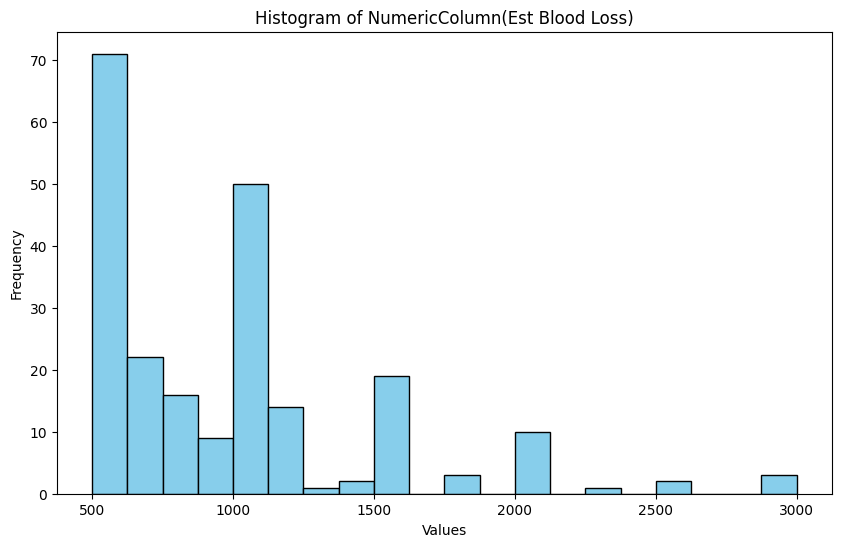

In [ ]:
# Example 1: Histogram of a numeric column (Est Blood Loss)
plt.figure(figsize=(10, 6))
plt.hist(df['Est Blood Loss'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of NumericColumn(Est Blood Loss)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

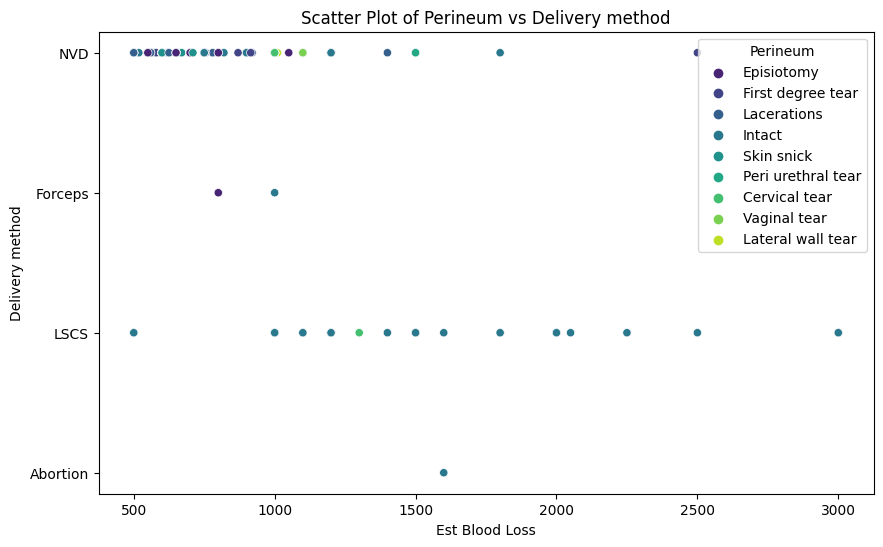

In [ ]:
# Example 2: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Est Blood Loss', y='Delivery method', data=df, hue='Perineum', palette='viridis')
plt.title('Scatter Plot of Perineum vs Delivery method')
plt.show()

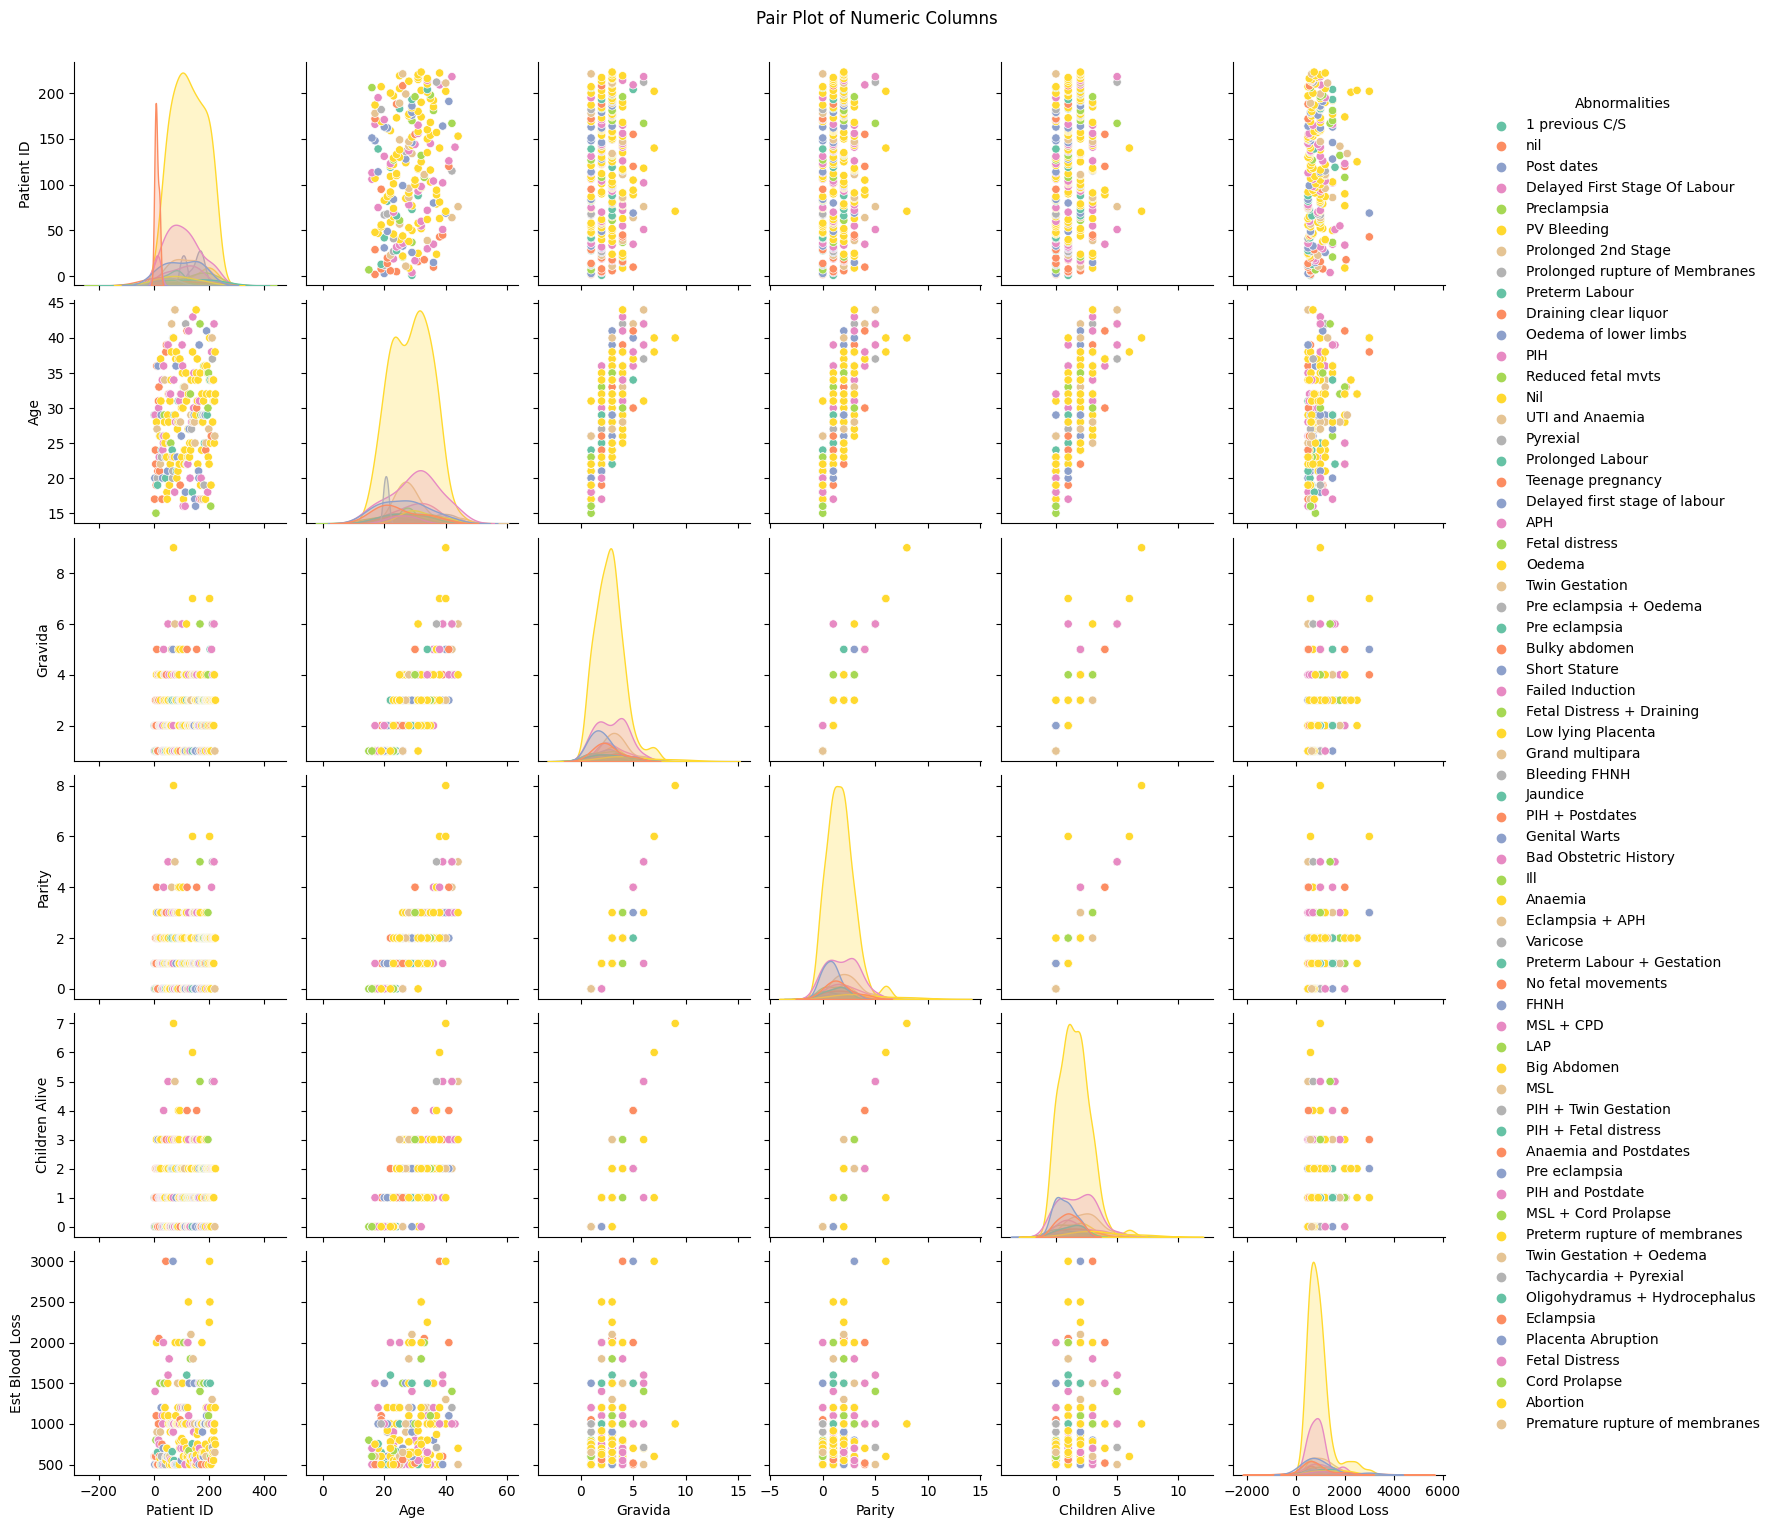

In [ ]:
# Example 3: Pair plot (scatterplot matrix)
sns.pairplot(df, hue='Abnormalities', palette='Set2')
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

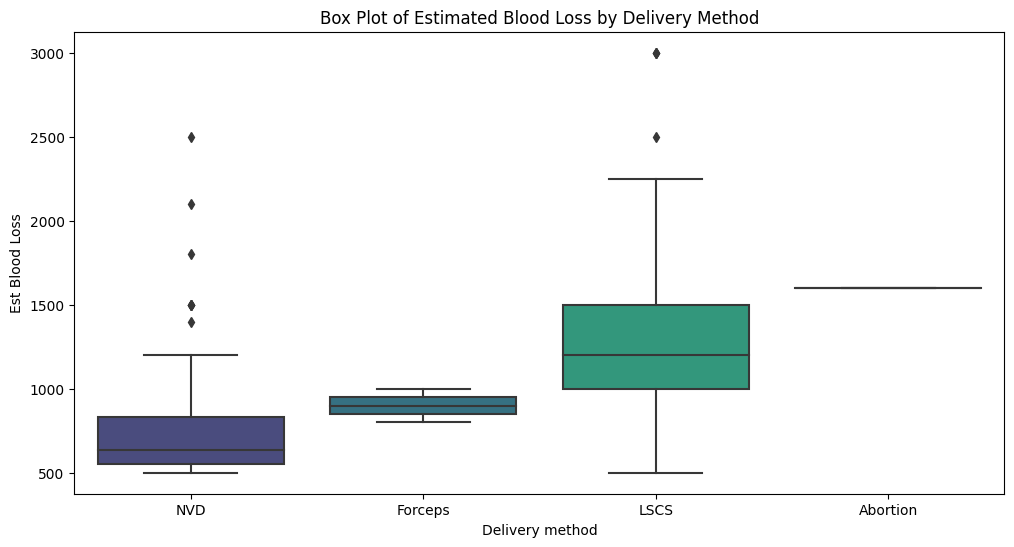

In [ ]:
# Box Plot for Numeric Columns by Delivery Method
plt.figure(figsize=(12, 6))
sns.boxplot(x='Delivery method', y='Est Blood Loss', data=df, palette='viridis')
plt.title('Box Plot of Estimated Blood Loss by Delivery Method')
plt.show()

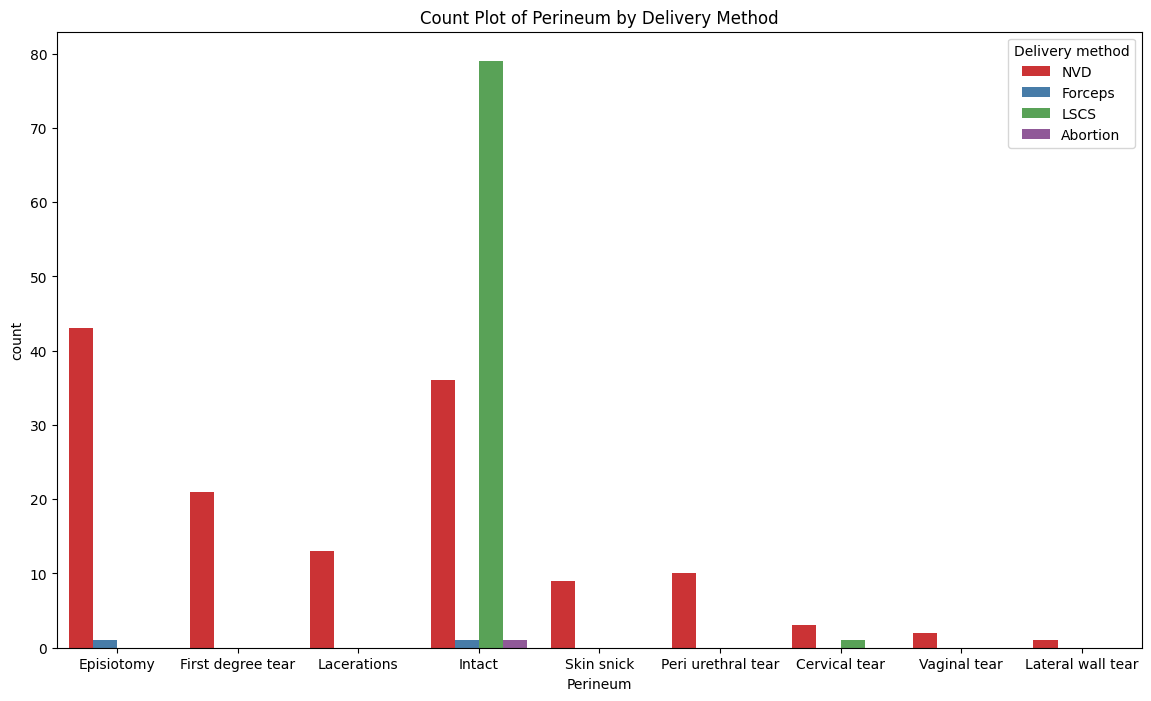

In [ ]:
# Count Plot for Categorical Columns
plt.figure(figsize=(14, 8))
sns.countplot(x='Perineum', data=df, hue='Delivery method', palette='Set1')
plt.title('Count Plot of Perineum by Delivery Method')
plt.show()

<ipython-input-21-87c000a6cd62>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


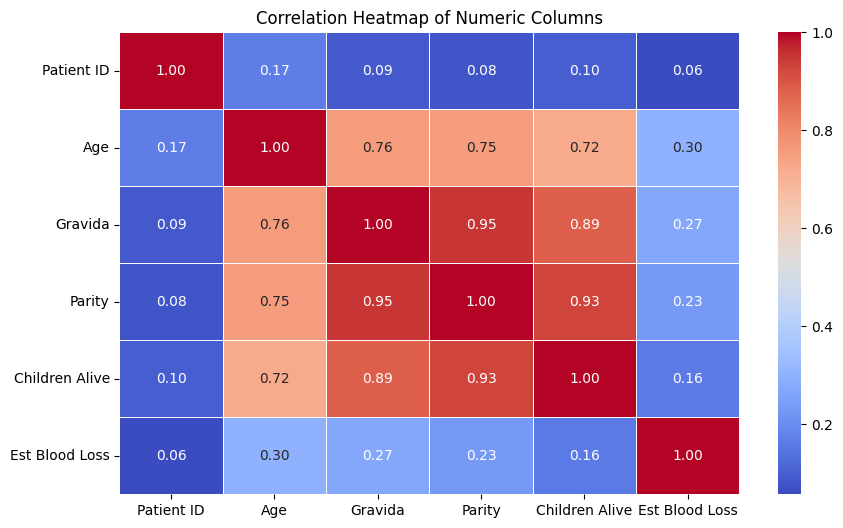

In [ ]:
# Correlation Heatmap for Numeric Columns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

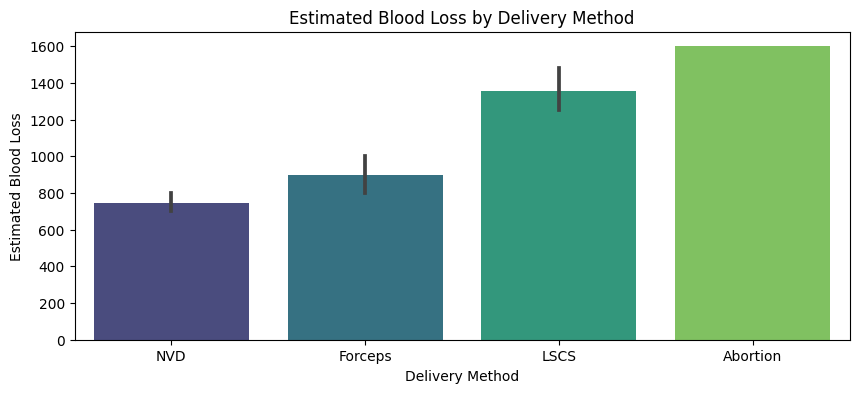

In [ ]:
#Tanha's part

# Extract 'Est Blood Loss' and 'Delivery method'
est_blood_loss = df['Est Blood Loss']
delivery_method = df['Delivery method']

# Create a bar graph
plt.figure(figsize=(10, 4))
sns.barplot(x=delivery_method, y=est_blood_loss, palette='viridis')
plt.title('Estimated Blood Loss by Delivery Method')
plt.xlabel('Delivery Method')
plt.ylabel('Estimated Blood Loss')
plt.show()


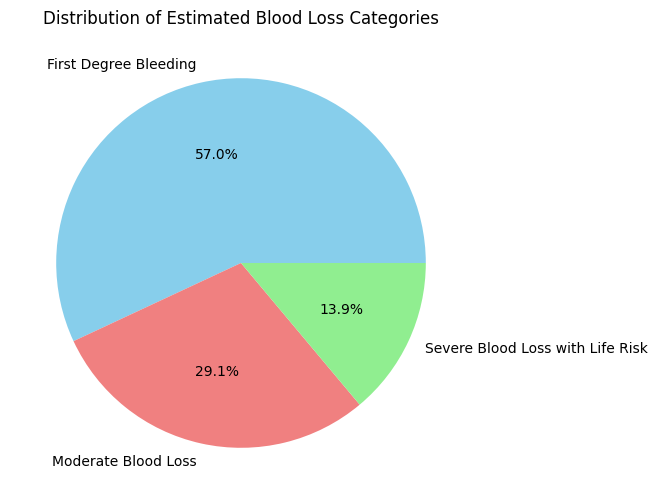

In [ ]:
# Extract 'Est Blood Loss'
est_blood_loss = df['Est Blood Loss']

# Define the categories
categories = ['First Degree Bleeding', 'Moderate Blood Loss', 'Severe Blood Loss with Life Risk']

# Bin the values into categories
est_blood_loss_categories = pd.cut(est_blood_loss, bins=[-float('inf'), 500, 1000, float('inf')], labels=categories, include_lowest=True)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(est_blood_loss_categories.value_counts(), labels=categories, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Estimated Blood Loss Categories')
plt.show()


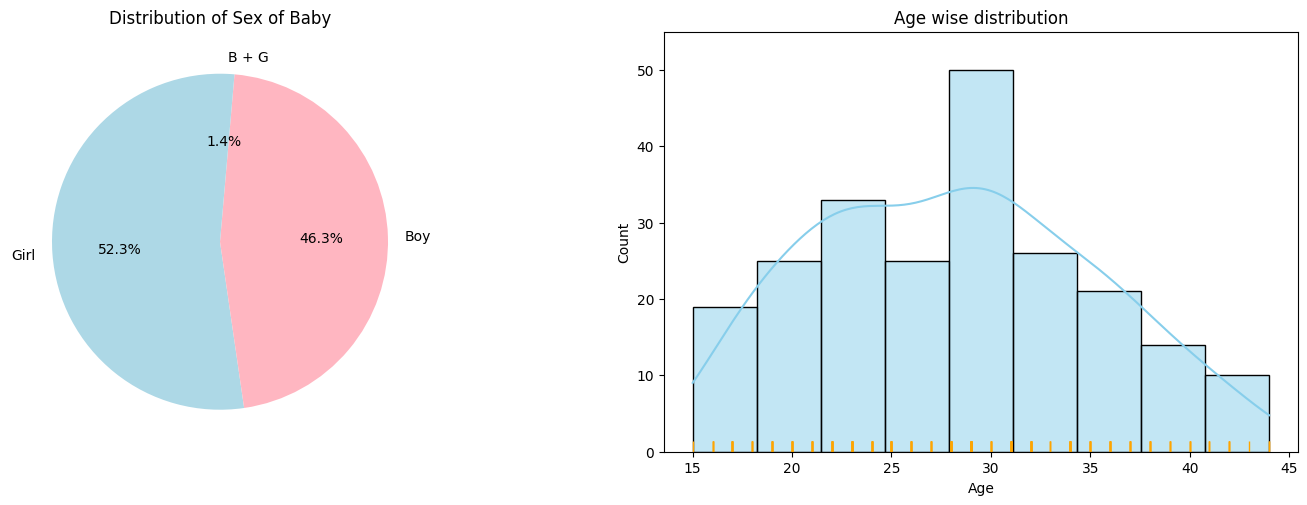

In [ ]:
#Jishan's part

# "Sex of Baby" and "Age" visualization
sex_counts = df['Sex of Baby'].value_counts()

plt.figure(figsize=(18, 12))

plt.subplot(221)
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Distribution of Sex of Baby')

plt.subplot(222)
sns.histplot(df['Age'], kde=True, color='skyblue')
sns.rugplot(df['Age'], color='orange')
plt.title("Age wise distribution")

plt.show()

Data Pre-processing

Handleing missing values

In [ ]:
print(df.columns)

Index(['Patient ID', 'Age', 'GA', '            B/U', 'Gravida', 'Parity',
       'Children Alive', 'Past Obst Complications', 'Abnormalities',
       'Duration of Labour', 'Delivery method', 'Est Blood Loss', 'Perineum',
       'Birth weight', 'Sex of Baby', 'HIV Status'],
      dtype='object')


In [ ]:
#'Perineum' column missing value remove....

#Identify the mode of the 'Perineum' column:
mode_value = df['Perineum'].mode()[0]

In [ ]:
#Fill in the missing values with the mode
df['Perineum'] = df['Perineum'].fillna(mode_value)

In [ ]:
pd.set_option('display.max_rows', None)
print(df['Perineum'])

0              Episiotomy
1              Episiotomy
2       First degree tear
3             Lacerations
4              Episiotomy
5                  Intact
6              Episiotomy
7              Episiotomy
8                  Intact
9             Lacerations
10             Skin snick
11             Episiotomy
12                 Intact
13             Episiotomy
14                 Intact
15                 Intact
16                 Intact
17                 Intact
18             Episiotomy
19             Episiotomy
20                 Intact
21     Peri urethral tear
22     Peri urethral tear
23                 Intact
24      First degree tear
25                 Intact
26                 Intact
27     Peri urethral tear
28             Episiotomy
29                 Intact
30             Episiotomy
31                 Intact
32             Episiotomy
33                 Intact
34                 Intact
35      First degree tear
36                 Intact
37                 Intact
38          

In [ ]:
#Jishan's part

# Converting 'duration of labour' from categorical to numerical and handleing missing values.......

# Function to convert time duration to seconds
def convert_to_seconds(duration):
    if pd.isna(duration) or not any(char.isdigit() for char in str(duration)):
        return 0

    parts = [part.strip() for part in str(duration).split()]

    hours, minutes = 0, 0

    for part in parts:
        if 'h' in part:
            try:
                hours = int(part.replace('h', ''))
            except ValueError:
                hours = 0
        elif 'min' in part:
            try:
                minutes = int(part.replace('min', ''))
            except ValueError:
                minutes = 0

    return hours * 3600 + minutes * 60

In [ ]:
# Apply the conversion function to the "Duration of Labour" column
df['Duration of Labour'] = df['Duration of Labour'].apply(convert_to_seconds)

In [ ]:
#print updated df
pd.set_option('display.max_rows', None)
print(df['Duration of Labour'])

0       28800
1       74100
2       77100
3       69900
4       27600
5       35460
6           0
7       66000
8           0
9       69600
10       3000
11      15600
12      45600
13     106740
14      35880
15          0
16      40800
17          0
18      30600
19          0
20          0
21      35520
22      39000
23      23280
24      21000
25          0
26      19320
27      25380
28      45540
29          0
30      63000
31          0
32      53100
33          0
34          0
35      43620
36          0
37          0
38      63900
39      70560
40      35700
41      27600
42          0
43      13800
44      66780
45      19200
46      62700
47      19740
48      37500
49      24540
50          0
51      30000
52      48300
53      45300
54          0
55      42900
56      18000
57          0
58      16200
59      43200
60          0
61      14520
62      97140
63      28260
64      43200
65      41700
66          0
67      32940
68          0
69          0
70          0
71    

In [ ]:
#Converting 'Birth weight' from categorical to numerical and handle missing values.............

birth_weight_df = df['Birth weight'].copy()

# Convert 'missing' to NaN
birth_weight_df.replace('missing', np.nan, inplace=True)

# Extract numerical values, considering 'MSB' and 'Fresh SB' as 0
birth_weight_df = birth_weight_df.str.extract('(\d+|\d+g MSB|\d+ Fresh SB)').fillna(0)

# Convert to numeric
birth_weight_df = pd.to_numeric(birth_weight_df[0], errors='coerce')

# Replace 0 with NaN
birth_weight_df.replace(0, np.nan, inplace=True)

# Update the original DataFrame
df['Birth weight'] = birth_weight_df

#print updated df
pd.set_option('display.max_rows', None)
print(df['Birth weight'])

0      2800.0
1      3000.0
2      3300.0
3      3050.0
4      3500.0
5      2900.0
6      3300.0
7      3350.0
8      1500.0
9      3000.0
10     3000.0
11     3100.0
12     2800.0
13     2500.0
14     4100.0
15     2600.0
16     3100.0
17     3500.0
18     4400.0
19     3500.0
20     3000.0
21     3500.0
22     1900.0
23     2750.0
24     3200.0
25     3700.0
26     2400.0
27     4000.0
28     3250.0
29     2900.0
30     3400.0
31     3700.0
32     3100.0
33     1300.0
34     2650.0
35     3000.0
36     3500.0
37     1600.0
38     1600.0
39     3500.0
40     2600.0
41     3000.0
42     2600.0
43     2700.0
44     4250.0
45     2700.0
46     3100.0
47     2900.0
48     3300.0
49     3000.0
50      500.0
51     3000.0
52     3800.0
53     3650.0
54     3500.0
55      200.0
56     3100.0
57     3200.0
58     3500.0
59     3900.0
60     3000.0
61     2000.0
62     3300.0
63     3100.0
64     3500.0
65     3300.0
66     4250.0
67     3800.0
68     3400.0
69     3450.0
70     1650.0
71    

In [ ]:
# Replace missing values with the median
median_birth_weight = df['Birth weight'].median()
df['Birth weight'].fillna(median_birth_weight, inplace=True)


In [ ]:
print(df['Birth weight'])


0      2800.0
1      3000.0
2      3300.0
3      3050.0
4      3500.0
5      2900.0
6      3300.0
7      3350.0
8      1500.0
9      3000.0
10     3000.0
11     3100.0
12     2800.0
13     2500.0
14     4100.0
15     2600.0
16     3100.0
17     3500.0
18     4400.0
19     3500.0
20     3000.0
21     3500.0
22     1900.0
23     2750.0
24     3200.0
25     3700.0
26     2400.0
27     4000.0
28     3250.0
29     2900.0
30     3400.0
31     3700.0
32     3100.0
33     1300.0
34     2650.0
35     3000.0
36     3500.0
37     1600.0
38     1600.0
39     3500.0
40     2600.0
41     3000.0
42     2600.0
43     2700.0
44     4250.0
45     2700.0
46     3100.0
47     2900.0
48     3300.0
49     3000.0
50      500.0
51     3000.0
52     3800.0
53     3650.0
54     3500.0
55      200.0
56     3100.0
57     3200.0
58     3500.0
59     3900.0
60     3000.0
61     2000.0
62     3300.0
63     3100.0
64     3500.0
65     3300.0
66     4250.0
67     3800.0
68     3400.0
69     3450.0
70     1650.0
71    

In [ ]:
#Tanha's part

# Replace missing values with the mode
mode_sex = df['Sex of Baby'].mode()[0]
df['Sex of Baby'].fillna(mode_sex, inplace=True)


In [ ]:
pd.set_option('display.max_rows', None)
print(df['Sex of Baby'])

0        Boy
1        Boy
2       Girl
3       Girl
4        Boy
5       Girl
6       Girl
7       Girl
8       Girl
9        Boy
10      Girl
11       Boy
12      Girl
13      Girl
14      Girl
15       Boy
16      Girl
17      Girl
18      Girl
19       Boy
20      Girl
21      Girl
22      Girl
23      Girl
24       Boy
25      Girl
26      Girl
27      Girl
28       Boy
29       Boy
30      Girl
31      Girl
32       Boy
33       Boy
34       Boy
35       Boy
36       Boy
37      Girl
38       Boy
39       Boy
40       Boy
41      Girl
42      Girl
43      Girl
44       Boy
45       Boy
46       Boy
47      Girl
48       Boy
49      Girl
50      Girl
51       Boy
52      Girl
53       Boy
54       Boy
55      Girl
56      Girl
57       Boy
58      Girl
59       Boy
60      Girl
61      Girl
62      Girl
63       Boy
64      Girl
65       Boy
66       Boy
67      Girl
68       Boy
69      Girl
70      Girl
71       Boy
72      Girl
73      Girl
74      Girl
75      Girl
76      Girl

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Patient ID                 0
Age                        0
GA                         0
            B/U            0
Gravida                    0
Parity                     0
Children Alive             0
Past Obst Complications    0
Abnormalities              0
Duration of Labour         0
Delivery method            0
Est Blood Loss             0
Perineum                   0
Birth weight               0
Sex of Baby                0
HIV Status                 0
dtype: int64


Removing irrelevant Column

In [ ]:
print(df.columns)

Index(['Patient ID', 'Age', 'GA', '            B/U', 'Gravida', 'Parity',
       'Children Alive', 'Past Obst Complications', 'Abnormalities',
       'Duration of Labour', 'Delivery method', 'Est Blood Loss', 'Perineum',
       'Birth weight', 'Sex of Baby', 'HIV Status'],
      dtype='object')


In [ ]:
#Tanha's part

#irrelevant column removal
df = df.drop(['Patient ID', '            B/U'], axis=1)
# Print the updated DataFrame
print(df)

     Age   GA  Gravida  Parity  Children Alive  \
0     29   37        2       1               1   
1     17   37        1       0               0   
2     20   41        1       0               0   
3     29   39        2       1               1   
4     24   43        2       1               1   
5     22   38        3       2               2   
6     15   39        1       0               0   
7     19   39        2       1               1   
8     28  NSD        4       3               3   
9     36   38        5       4               2   
10    27  NSD        3       2               2   
11    20   39        1       0               0   
12    19   36        1       0               0   
13    21   36        1       0               0   
14    36   40        4       3               3   
15    31  NSD        4       2               2   
16    30   40        3       2               2   
17    33   39        3       2               1   
18    23  NSD        2       1               1   


Converting Categorical data to numerical data

In [ ]:
#'Perineum' is the column to be encoded to numerical
le = LabelEncoder()
df['Perineum'] = le.fit_transform(df['Perineum'].astype(str))

# Check the mapping of original categories to numerical values
mapping_perineum = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping of Perineum:")
print(mapping_perineum)

Mapping of Perineum:
{'Cervical tear': 0, 'Episiotomy': 1, 'First degree tear': 2, 'Intact': 3, 'Lacerations': 4, 'Lateral wall tear': 5, 'Peri urethral tear': 6, 'Skin snick': 7, 'Vaginal tear': 8}


In [ ]:
pd.set_option('display.max_rows', None)
print(df['Perineum'])

0      1
1      1
2      2
3      4
4      1
5      3
6      1
7      1
8      3
9      4
10     7
11     1
12     3
13     1
14     3
15     3
16     3
17     3
18     1
19     1
20     3
21     6
22     6
23     3
24     2
25     3
26     3
27     6
28     1
29     3
30     1
31     3
32     1
33     3
34     3
35     2
36     3
37     3
38     3
39     6
40     1
41     2
42     3
43     2
44     4
45     0
46     1
47     1
48     3
49     2
50     3
51     8
52     4
53     1
54     3
55     3
56     3
57     3
58     3
59     2
60     3
61     5
62     3
63     3
64     2
65     6
66     3
67     1
68     3
69     1
70     3
71     3
72     6
73     1
74     1
75     3
76     3
77     0
78     3
79     3
80     3
81     1
82     1
83     3
84     3
85     3
86     1
87     2
88     3
89     3
90     3
91     3
92     3
93     2
94     1
95     3
96     3
97     2
98     3
99     3
100    3
101    3
102    3
103    3
104    3
105    1
106    1
107    3
108    4
109    3
110    3
1

In [ ]:
#Delivery Method is encoded to numerical
le = LabelEncoder()
df['Delivery method'] = le.fit_transform(df['Delivery method'])

# Check the mapping of original categories to numerical values
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping of Delivery method:")
print(mapping)

Mapping of Delivery method:
{'Abortion': 0, 'Forceps': 1, 'LSCS': 2, 'NVD': 3}


In [ ]:
pd.set_option('display.max_rows', None)
print(df['Delivery method'])

0      3
1      3
2      3
3      3
4      3
5      3
6      1
7      3
8      2
9      3
10     3
11     3
12     3
13     3
14     3
15     2
16     3
17     2
18     3
19     3
20     2
21     3
22     3
23     3
24     3
25     2
26     3
27     3
28     3
29     2
30     3
31     2
32     3
33     2
34     2
35     3
36     2
37     2
38     3
39     3
40     3
41     3
42     2
43     3
44     3
45     3
46     3
47     3
48     3
49     3
50     2
51     3
52     3
53     3
54     2
55     3
56     3
57     2
58     3
59     3
60     2
61     3
62     3
63     1
64     3
65     3
66     2
67     3
68     2
69     3
70     2
71     2
72     3
73     3
74     3
75     3
76     2
77     3
78     2
79     2
80     2
81     3
82     3
83     2
84     2
85     2
86     3
87     3
88     2
89     2
90     3
91     3
92     2
93     3
94     3
95     2
96     3
97     3
98     3
99     2
100    3
101    2
102    2
103    2
104    2
105    3
106    3
107    2
108    3
109    3
110    2
1

In [ ]:
#'Abnormalities' encoded to numerical.

# Applying one-hot encoding to the 'Abnormalities' column
df = pd.get_dummies(df, columns=['Abnormalities'], prefix='Abnormality')

# Display the updated DataFrame
print(df.head())



   Age  GA  Gravida  Parity  Children Alive Past Obst Complications  \
0   29  37        2       1               1          1 previous C/S   
1   17  37        1       0               0                     nil   
2   20  41        1       0               0                     nil   
3   29  39        2       1               1                     nil   
4   24  43        2       1               1                     nil   

   Duration of Labour  Delivery method  Est Blood Loss  Perineum  ...  \
0               28800                3             600         1  ...   
1               74100                3             600         1  ...   
2               77100                3             500         2  ...   
3               69900                3            1400         4  ...   
4               27600                3             600         1  ...   

   Abnormality_Pyrexial Abnormality_Reduced fetal mvts  \
0                     0                              0   
1                 

In [ ]:
#'Past Obst Complications' columns encoded to numerical

le = LabelEncoder()
df['Past Obst Complications'] = le.fit_transform(df['Past Obst Complications'].astype(str))

# Check the mapping of original categories to numerical values
mapping_past_obst_complications = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping of Past Obst Complications:")
print(mapping_past_obst_complications)

Mapping of Past Obst Complications:
{'   1 previous C/S': 0, ' ENND': 1, '1 Early Neonatal Death': 2, '1 NND': 3, '1 Previous C/S': 4, '1 Previous C/S + StillBirth': 5, '1 Previous StillBirth': 6, '1 Previous miscarriage': 7, '1 miscarriage': 8, '1 miscarriage + 1 ENND': 9, '1 pevious miscarriage': 10, '1 previous C/S': 11, '1 previous C/S + APH': 12, '1 previous Vacuum Extraction': 13, '1 previous miscarriage': 14, '2 previous C/S': 15, '2 previous C/S + twin gestation': 16, '2 previous C/S +2 StillBirths': 17, '2 previous StillBirths': 18, '2 previous miscarriges': 19, '3 Previous PPH': 20, '3 UID + ENND': 21, 'Abortion': 22, 'Cord prolapse': 23, 'Early NeoNatal Death': 24, 'Early Neonatal Death ': 25, 'Early Neonatal Death + Neonatal Deth': 26, 'Ectopic Pregnancy': 27, 'History of big babies': 28, 'I previous StillBirth': 29, 'LSCS': 30, 'Miscarriage + Neonatal Death': 31, 'Nil': 32, 'PIH': 33, 'PPH': 34, 'Post dates': 35, 'Previous Abortion': 36, 'Previous StillBirth': 37, 'Previou

In [ ]:
#updated df
pd.set_option('display.max_rows', None)
print(df['Past Obst Complications'])

0      11
1      39
2      39
3      39
4      39
5      39
6      39
7      39
8      11
9      18
10     39
11     39
12     39
13     39
14     39
15      8
16     39
17     24
18     39
19     24
20     27
21     32
22     32
23     32
24     30
25      0
26     32
27     32
28     32
29     32
30     32
31     33
32     32
33      2
34     32
35     32
36     19
37     32
38     32
39     32
40     32
41     32
42     32
43      4
44     32
45     37
46     32
47     32
48     32
49      4
50     32
51     32
52     32
53     32
54     32
55     32
56     32
57     32
58     32
59      5
60     32
61     32
62     32
63     26
64     31
65     32
66     32
67     32
68      9
69     33
70      8
71     32
72     32
73     32
74     32
75     23
76     25
77     32
78     11
79      8
80     16
81     32
82     32
83     32
84     11
85     11
86     32
87     32
88     15
89     11
90     32
91     32
92     32
93     32
94     32
95     32
96     32
97      3
98     11
99     15


In [ ]:
#tanha's part

#'Sex of Baby' column encoded to numeric
le = LabelEncoder()
df['Sex of Baby'] = le.fit_transform(df['Sex of Baby'].astype(str))

# Check the mapping of original categories to numerical values
mapping_sex_of_baby = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping of Sex of Baby:")
print(mapping_sex_of_baby)

Mapping of Sex of Baby:
{'B + G': 0, 'Boy': 1, 'Girl': 2}


In [ ]:
#updated df
pd.set_option('display.max_rows', None)
print(df['Sex of Baby'])

0      1
1      1
2      2
3      2
4      1
5      2
6      2
7      2
8      2
9      1
10     2
11     1
12     2
13     2
14     2
15     1
16     2
17     2
18     2
19     1
20     2
21     2
22     2
23     2
24     1
25     2
26     2
27     2
28     1
29     1
30     2
31     2
32     1
33     1
34     1
35     1
36     1
37     2
38     1
39     1
40     1
41     2
42     2
43     2
44     1
45     1
46     1
47     2
48     1
49     2
50     2
51     1
52     2
53     1
54     1
55     2
56     2
57     1
58     2
59     1
60     2
61     2
62     2
63     1
64     2
65     1
66     1
67     2
68     1
69     2
70     2
71     1
72     2
73     2
74     2
75     2
76     2
77     2
78     1
79     2
80     1
81     2
82     1
83     2
84     2
85     0
86     2
87     2
88     1
89     2
90     1
91     1
92     2
93     1
94     2
95     1
96     2
97     2
98     2
99     1
100    2
101    1
102    1
103    1
104    2
105    1
106    1
107    2
108    2
109    2
110    2
1

In [ ]:
#jishan's part

#'HIV Status' column encoded to numeric

# Convert 'Unknown' to a specific numeric value, let's say 2
unknown_numeric_value = 2
df['HIV Status'] = df['HIV Status'].map(lambda x: unknown_numeric_value if x == 'Unknown' else x)

# Check the unique values in the column
print("Unique values in 'HIV Status' after mapping:")
print(df['HIV Status'].unique())


Unique values in 'HIV Status' after mapping:
[0 1 2]


In [ ]:
#Updated df
pd.set_option('display.max_rows', None)
print(df['HIV Status'])

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     0
12     0
13     1
14     0
15     0
16     0
17     0
18     0
19     0
20     2
21     0
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     1
34     2
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     2
44     0
45     0
46     0
47     0
48     0
49     0
50     2
51     2
52     0
53     0
54     1
55     1
56     0
57     0
58     2
59     0
60     0
61     1
62     1
63     1
64     0
65     0
66     0
67     1
68     0
69     0
70     2
71     0
72     1
73     1
74     0
75     0
76     1
77     0
78     2
79     1
80     1
81     0
82     2
83     1
84     1
85     0
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     1
94     0
95     0
96     1
97     0
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    2
108    0
109    1
110    0
1

In [ ]:
#Tanha's part

#'GA' column encoded to numeric

unknown_numeric_value = 6
df['GA'] = pd.to_numeric(df['GA'], errors='coerce').fillna(unknown_numeric_value)

# Check the unique values in the column
print("Unique values in 'GA' after conversion:")
print(df['GA'].unique())


Unique values in 'GA' after conversion:
[37. 41. 39. 43. 38.  6. 36. 40. 42. 28. 33. 35. 26. 25. 32. 22. 34. 24.
 29. 27. 23.]


In [ ]:
pd.set_option('display.max_rows', None)
print(df['GA'])

0      37.0
1      37.0
2      41.0
3      39.0
4      43.0
5      38.0
6      39.0
7      39.0
8       6.0
9      38.0
10      6.0
11     39.0
12     36.0
13     36.0
14     40.0
15      6.0
16     40.0
17     39.0
18      6.0
19     37.0
20      6.0
21     41.0
22      6.0
23     39.0
24     39.0
25     42.0
26      6.0
27     41.0
28      6.0
29      6.0
30     39.0
31     40.0
32     40.0
33     28.0
34      6.0
35      6.0
36     41.0
37     33.0
38     33.0
39     39.0
40      6.0
41      6.0
42     35.0
43     38.0
44     41.0
45     37.0
46     39.0
47     39.0
48     40.0
49      6.0
50     26.0
51      6.0
52     41.0
53     40.0
54      6.0
55      6.0
56     38.0
57     38.0
58      6.0
59     38.0
60      6.0
61     39.0
62     40.0
63     40.0
64     40.0
65      6.0
66     37.0
67      6.0
68     41.0
69      6.0
70      6.0
71      6.0
72     37.0
73     41.0
74      6.0
75     25.0
76     40.0
77     41.0
78     39.0
79     38.0
80     38.0
81     40.0
82     36.0
83  

In [ ]:
df.dtypes

Age                                             int64
GA                                            float64
Gravida                                         int64
Parity                                          int64
Children Alive                                  int64
Past Obst Complications                         int64
Duration of Labour                              int64
Delivery method                                 int64
Est Blood Loss                                  int64
Perineum                                        int64
Birth weight                                  float64
Sex of Baby                                     int64
HIV Status                                      int64
Abnormality_1 previous C/S                      uint8
Abnormality_APH                                 uint8
Abnormality_Abortion                            uint8
Abnormality_Anaemia                             uint8
Abnormality_Anaemia and Postdates               uint8
Abnormality_Bad Obstetric Hi

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Age                                           0
GA                                            0
Gravida                                       0
Parity                                        0
Children Alive                                0
Past Obst Complications                       0
Duration of Labour                            0
Delivery method                               0
Est Blood Loss                                0
Perineum                                      0
Birth weight                                  0
Sex of Baby                                   0
HIV Status                                    0
Abnormality_1 previous C/S                    0
Abnormality_APH                               0
Abnormality_Abortion                          0
Abnormality_Anaemia                           0
Abnormality_Anaemia and Postdates             0
Abnormality_Bad Obstetric History             0
Abnormality_Big Abdomen                       0
Abnormality_Bleeding FH

In [ ]:
print(df.columns)

Index(['Age', 'GA', 'Gravida', 'Parity', 'Children Alive',
       'Past Obst Complications', 'Duration of Labour', 'Delivery method',
       'Est Blood Loss', 'Perineum', 'Birth weight', 'Sex of Baby',
       'HIV Status', 'Abnormality_1 previous C/S', 'Abnormality_APH',
       'Abnormality_Abortion', 'Abnormality_Anaemia',
       'Abnormality_Anaemia and Postdates',
       'Abnormality_Bad Obstetric History', 'Abnormality_Big Abdomen',
       'Abnormality_Bleeding FHNH', 'Abnormality_Bulky abdomen',
       'Abnormality_Cord Prolapse',
       'Abnormality_Delayed First Stage Of Labour',
       'Abnormality_Delayed first stage of labour',
       'Abnormality_Draining clear liquor', 'Abnormality_Eclampsia',
       'Abnormality_Eclampsia + APH', 'Abnormality_FHNH',
       'Abnormality_Failed Induction', 'Abnormality_Fetal Distress',
       'Abnormality_Fetal Distress + Draining', 'Abnormality_Fetal distress',
       'Abnormality_Genital Warts', 'Abnormality_Grand multipara',
       'Abnor

Is there any Outliers?

In [ ]:
#calculate the IQR (Interquartile Range)
columns_of_interest = ['Age', 'GA', 'Gravida', 'Parity', 'Children Alive',
       'Past Obst Complications', 'Duration of Labour', 'Delivery method',
       'Est Blood Loss', 'Perineum', 'Birth weight', 'Sex of Baby',
       'HIV Status']

# Calculate the IQR for each column
for column in columns_of_interest:
    # Exclude non-numeric columns
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        print(f"IQR for '{column}': {IQR}")


IQR for 'Age': 11.0
IQR for 'GA': 14.5
IQR for 'Gravida': 2.0
IQR for 'Parity': 1.0
IQR for 'Children Alive': 1.5
IQR for 'Past Obst Complications': 12.5
IQR for 'Duration of Labour': 39900.0
IQR for 'Delivery method': 1.0
IQR for 'Est Blood Loss': 500.0
IQR for 'Perineum': 1.0
IQR for 'Birth weight': 725.0
IQR for 'Sex of Baby': 1.0
IQR for 'HIV Status': 0.0


In [ ]:
# Identify potential outliers
columns_of_interest = ['Age', 'GA', 'Gravida', 'Parity', 'Children Alive',
       'Past Obst Complications', 'Duration of Labour', 'Delivery method',
       'Est Blood Loss', 'Perineum', 'Birth weight', 'Sex of Baby',
       'HIV Status']

# Identify potential outliers for each column
for column in columns_of_interest:
    # Exclude non-numeric columns
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for potential outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify potential outliers
        potential_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        print(f"Potential outliers for '{column}':")
        print(potential_outliers)
        print("\n")


Potential outliers for 'Age':
Empty DataFrame
Columns: [Age, GA, Gravida, Parity, Children Alive, Past Obst Complications, Duration of Labour, Delivery method, Est Blood Loss, Perineum, Birth weight, Sex of Baby, HIV Status, Abnormality_1 previous C/S, Abnormality_APH, Abnormality_Abortion, Abnormality_Anaemia, Abnormality_Anaemia and Postdates, Abnormality_Bad Obstetric History, Abnormality_Big Abdomen, Abnormality_Bleeding FHNH, Abnormality_Bulky abdomen, Abnormality_Cord Prolapse, Abnormality_Delayed First Stage Of Labour, Abnormality_Delayed first stage of labour, Abnormality_Draining clear liquor, Abnormality_Eclampsia, Abnormality_Eclampsia + APH, Abnormality_FHNH, Abnormality_Failed Induction, Abnormality_Fetal Distress, Abnormality_Fetal Distress + Draining, Abnormality_Fetal distress, Abnormality_Genital Warts, Abnormality_Grand multipara, Abnormality_Ill, Abnormality_Jaundice, Abnormality_LAP, Abnormality_Low lying Placenta, Abnormality_MSL, Abnormality_MSL + CPD, Abnormality

There are Outliers of
Gravida: One potential outlier is identified with a Gravida value of 9.

Parity: Several potential outliers are identified with Parity values of 4, 5, 6, 8. Some of these entries have a gestational age (GA) of 0, so it's essential to investigate further if these are valid data points.

Children Alive: Several potential outliers are identified with Children Alive values of 5, 6, 7.

Est Blood Loss: Several potential outliers are identified with Est Blood Loss values of 2000, 2050, 3000.

Using z-score for removing outliers and also data transformation

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(df[['Gravida', 'Parity', 'Children Alive', 'Est Blood Loss']])

# Identify and remove outliers
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1) & (z_scores > -threshold).all(axis=1)]


In [ ]:
df_no_outliers.shape

(216, 76)

In [ ]:
# Save the updated DataFrame to a new Excel file if needed
df_no_outliers.to_excel('updated_php.xlsx', index=False)

# Display the DataFrame
df.tail()

,Age,GA,Gravida,Parity,Children Alive,Past Obst Complications,Duration of Labour,Delivery method,Est Blood Loss,Perineum,...,Abnormality_Pyrexial,Abnormality_Reduced fetal mvts,Abnormality_Short Stature,Abnormality_Tachycardia + Pyrexial,Abnormality_Teenage pregnancy,Abnormality_Twin Gestation,Abnormality_Twin Gestation + Oedema,Abnormality_UTI and Anaemia,Abnormality_Varicose,Abnormality_nil
218,25,6.0,4,2,2,14,43500,3,800,1,...,0,0,0,0,0,0,0,0,0,0
219,31,35.0,3,2,2,11,0,2,1000,3,...,0,0,0,0,0,0,0,0,0,0
220,26,43.0,1,0,0,32,91440,3,650,1,...,0,0,0,0,0,0,0,0,0,0
221,38,38.0,3,2,2,15,0,2,1200,3,...,0,0,0,0,0,0,0,0,0,0
222,32,40.0,3,2,2,28,0,3,750,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df_no_outliers.columns)

Index(['Age', 'GA', 'Gravida', 'Parity', 'Children Alive',
       'Past Obst Complications', 'Duration of Labour', 'Delivery method',
       'Est Blood Loss', 'Perineum', 'Birth weight', 'Sex of Baby',
       'HIV Status', 'Abnormality_1 previous C/S', 'Abnormality_APH',
       'Abnormality_Abortion', 'Abnormality_Anaemia',
       'Abnormality_Anaemia and Postdates',
       'Abnormality_Bad Obstetric History', 'Abnormality_Big Abdomen',
       'Abnormality_Bleeding FHNH', 'Abnormality_Bulky abdomen',
       'Abnormality_Cord Prolapse',
       'Abnormality_Delayed First Stage Of Labour',
       'Abnormality_Delayed first stage of labour',
       'Abnormality_Draining clear liquor', 'Abnormality_Eclampsia',
       'Abnormality_Eclampsia + APH', 'Abnormality_FHNH',
       'Abnormality_Failed Induction', 'Abnormality_Fetal Distress',
       'Abnormality_Fetal Distress + Draining', 'Abnormality_Fetal distress',
       'Abnormality_Genital Warts', 'Abnormality_Grand multipara',
       'Abnor

Split the dataset into train and test set

In [ ]:
# Checking the shape of the resulting sets
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)

------------Training Set------------------
(172, 75)
(172,)
------------Test Set------------------
(44, 75)


In [ ]:
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



# Create a binary column indicating whether 'Est Blood Loss' is above a threshold
threshold = 1500
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_binary:", y_train_binary.shape)
print("Shape of y_test_binary:", y_test_binary.shape)

# Create SMOTE instance
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_binary)

# Display the shapes after resampling
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)



Shape of X_train: (172, 75)
Shape of X_test: (44, 75)
Shape of y_train_binary: (172,)
Shape of y_test_binary: (44,)
Shape of X_train_resampled: (316, 75)
Shape of y_train_resampled: (316,)


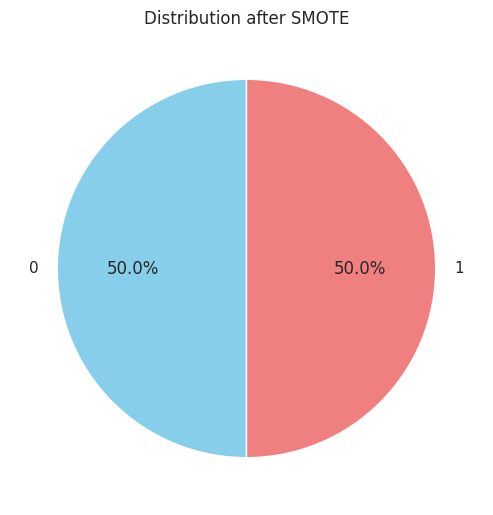

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the original 'Est Blood Loss'
plt.figure(figsize=(10, 6))


# Pie chart after applying SMOTE
plt.subplot(1, 2, 2)
plt.pie(y_train_resampled.value_counts(), labels=y_train_resampled.value_counts().index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution after SMOTE')

plt.tight_layout()
plt.show()




Normalization-minmax scalaer

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
logreg_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled training data
y_train_pred = logreg_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_test_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test_binary, y_test_pred)

# Print train and test accuracy
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print confusion matrix and classification report for test data
conf_matrix = confusion_matrix(y_test_binary, y_test_pred)
classification_rep = classification_report(y_test_binary, y_test_pred)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Training Accuracy: 0.9050632911392406
Test Accuracy: 0.7727272727272727

Confusion Matrix:
 [[33  9]
 [ 1  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87        42
           1       0.10      0.50      0.17         2

    accuracy                           0.77        44
   macro avg       0.54      0.64      0.52        44
weighted avg       0.93      0.77      0.84        44



Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model on the scaled training data
svm_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled training data
y_train_pred_svm = svm_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy_svm = accuracy_score(y_train_resampled, y_train_pred_svm)

# Evaluate the model on test data
test_accuracy_svm = accuracy_score(y_test_binary, y_test_pred_svm)

# Print train and test accuracy for SVM
print("Training Accuracy (SVM):", train_accuracy_svm)
print("Test Accuracy (SVM):", test_accuracy_svm)

# Print confusion matrix and classification report for test data (SVM)
conf_matrix_svm = confusion_matrix(y_test_binary, y_test_pred_svm)
classification_rep_svm = classification_report(y_test_binary, y_test_pred_svm)

print("\nConfusion Matrix (SVM):\n", conf_matrix_svm)
print("\nClassification Report (SVM):\n", classification_rep_svm)


Training Accuracy (SVM): 0.9556962025316456
Test Accuracy (SVM): 0.9545454545454546

Confusion Matrix (SVM):
 [[42  0]
 [ 2  0]]

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       0.00      0.00      0.00         2

    accuracy                           0.95        44
   macro avg       0.48      0.50      0.49        44
weighted avg       0.91      0.95      0.93        44



Decsion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the scaled training data
dt_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled training data
y_train_pred_dt = dt_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_test_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy_dt = accuracy_score(y_train_resampled, y_train_pred_dt)

# Evaluate the model on test data
test_accuracy_dt = accuracy_score(y_test_binary, y_test_pred_dt)

# Print train and test accuracy for Decision Tree
print("Training Accuracy (Decision Tree):", train_accuracy_dt)
print("Test Accuracy (Decision Tree):", test_accuracy_dt)

# Print confusion matrix and classification report for test data (Decision Tree)
conf_matrix_dt = confusion_matrix(y_test_binary, y_test_pred_dt)
classification_rep_dt = classification_report(y_test_binary, y_test_pred_dt)

print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_dt)
print("\nClassification Report (Decision Tree):\n", classification_rep_dt)


Training Accuracy (Decision Tree): 1.0
Test Accuracy (Decision Tree): 0.8636363636363636

Confusion Matrix (Decision Tree):
 [[36  6]
 [ 0  2]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        42
           1       0.25      1.00      0.40         2

    accuracy                           0.86        44
   macro avg       0.62      0.93      0.66        44
weighted avg       0.97      0.86      0.90        44



KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model on the scaled training data
knn_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled training data
y_train_pred_knn = knn_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy_knn = accuracy_score(y_train_resampled, y_train_pred_knn)

# Evaluate the model on test data
test_accuracy_knn = accuracy_score(y_test_binary, y_test_pred_knn)

# Print train and test accuracy for KNN Classifier
print("Training Accuracy (KNN Classifier):", train_accuracy_knn)
print("Test Accuracy (KNN Classifier):", test_accuracy_knn)

# Print confusion matrix and classification report for test data (KNN Classifier)
conf_matrix_knn = confusion_matrix(y_test_binary, y_test_pred_knn)
classification_rep_knn = classification_report(y_test_binary, y_test_pred_knn)

print("\nConfusion Matrix (KNN Classifier):\n", conf_matrix_knn)
print("\nClassification Report (KNN Classifier):\n", classification_rep_knn)


Training Accuracy (KNN Classifier): 0.8259493670886076
Test Accuracy (KNN Classifier): 0.5909090909090909

Confusion Matrix (KNN Classifier):
 [[25 17]
 [ 1  1]]

Classification Report (KNN Classifier):
               precision    recall  f1-score   support

           0       0.96      0.60      0.74        42
           1       0.06      0.50      0.10         2

    accuracy                           0.59        44
   macro avg       0.51      0.55      0.42        44
weighted avg       0.92      0.59      0.71        44



MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP classifier
mlp_model = MLPClassifier(random_state=42)

# Train the model on the scaled training data
mlp_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled training data
y_train_pred_mlp = mlp_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_test_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy_mlp = accuracy_score(y_train_resampled, y_train_pred_mlp)

# Evaluate the model on test data
test_accuracy_mlp = accuracy_score(y_test_binary, y_test_pred_mlp)

# Print train and test accuracy for MLP Classifier
print("Training Accuracy (MLP Classifier):", train_accuracy_mlp)
print("Test Accuracy (MLP Classifier):", test_accuracy_mlp)

# Print confusion matrix and classification report for test data (MLP Classifier)
conf_matrix_mlp = confusion_matrix(y_test_binary, y_test_pred_mlp)
classification_rep_mlp = classification_report(y_test_binary, y_test_pred_mlp)

print("\nConfusion Matrix (MLP Classifier):\n", conf_matrix_mlp)
print("\nClassification Report (MLP Classifier):\n", classification_rep_mlp)


Training Accuracy (MLP Classifier): 0.9715189873417721
Test Accuracy (MLP Classifier): 0.7727272727272727

Confusion Matrix (MLP Classifier):
 [[33  9]
 [ 1  1]]

Classification Report (MLP Classifier):
               precision    recall  f1-score   support

           0       0.97      0.79      0.87        42
           1       0.10      0.50      0.17         2

    accuracy                           0.77        44
   macro avg       0.54      0.64      0.52        44
weighted avg       0.93      0.77      0.84        44



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled training data
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)

# Evaluate the model on test data
test_accuracy_rf = accuracy_score(y_test_binary, y_test_pred_rf)

# Print train and test accuracy for Random Forest
print("Training Accuracy (Random Forest):", train_accuracy_rf)
print("Test Accuracy (Random Forest):", test_accuracy_rf)

# Print confusion matrix and classification report for test data (Random Forest)
conf_matrix_rf = confusion_matrix(y_test_binary, y_test_pred_rf)
classification_rep_rf = classification_report(y_test_binary, y_test_pred_rf)

print("\nConfusion Matrix (Random Forest):\n", conf_matrix_rf)
print("\nClassification Report (Random Forest):\n", classification_rep_rf)


Training Accuracy (Random Forest): 1.0
Test Accuracy (Random Forest): 0.9090909090909091

Confusion Matrix (Random Forest):
 [[40  2]
 [ 2  0]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.00      0.00      0.00         2

    accuracy                           0.91        44
   macro avg       0.48      0.48      0.48        44
weighted avg       0.91      0.91      0.91        44



Extra Tree

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the Extra Trees classifier
extra_trees_model = ExtraTreesClassifier(random_state=42)

# Train the model on the scaled training data
extra_trees_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled training data
y_train_pred_extra_trees = extra_trees_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_test_pred_extra_trees = extra_trees_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy_extra_trees = accuracy_score(y_train_resampled, y_train_pred_extra_trees)

# Evaluate the model on test data
test_accuracy_extra_trees = accuracy_score(y_test_binary, y_test_pred_extra_trees)

# Print train and test accuracy for Extra Trees
print("Training Accuracy (Extra Trees):", train_accuracy_extra_trees)
print("Test Accuracy (Extra Trees):", test_accuracy_extra_trees)

# Print confusion matrix and classification report for test data (Extra Trees)
conf_matrix_extra_trees = confusion_matrix(y_test_binary, y_test_pred_extra_trees)
classification_rep_extra_trees = classification_report(y_test_binary, y_test_pred_extra_trees)

print("\nConfusion Matrix (Extra Trees):\n", conf_matrix_extra_trees)
print("\nClassification Report (Extra Trees):\n", classification_rep_extra_trees)


Training Accuracy (Extra Trees): 1.0
Test Accuracy (Extra Trees): 0.9090909090909091

Confusion Matrix (Extra Trees):
 [[39  3]
 [ 1  1]]

Classification Report (Extra Trees):
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.25      0.50      0.33         2

    accuracy                           0.91        44
   macro avg       0.61      0.71      0.64        44
weighted avg       0.94      0.91      0.92        44



Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD classifier
sgd_model = SGDClassifier(random_state=42)

# Train the model on the scaled training data
sgd_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled training data
y_train_pred_sgd = sgd_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_test_pred_sgd = sgd_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy_sgd = accuracy_score(y_train_resampled, y_train_pred_sgd)

# Evaluate the model on test data
test_accuracy_sgd = accuracy_score(y_test_binary, y_test_pred_sgd)

# Print train and test accuracy for SGD
print("Training Accuracy (SGD):", train_accuracy_sgd)
print("Test Accuracy (SGD):", test_accuracy_sgd)

# Print confusion matrix and classification report for test data (SGD)
conf_matrix_sgd = confusion_matrix(y_test_binary, y_test_pred_sgd)
classification_rep_sgd = classification_report(y_test_binary, y_test_pred_sgd)

print("\nConfusion Matrix (SGD):\n", conf_matrix_sgd)
print("\nClassification Report (SGD):\n", classification_rep_sgd)


Training Accuracy (SGD): 0.9715189873417721
Test Accuracy (SGD): 0.7727272727272727

Confusion Matrix (SGD):
 [[33  9]
 [ 1  1]]

Classification Report (SGD):
               precision    recall  f1-score   support

           0       0.97      0.79      0.87        42
           1       0.10      0.50      0.17         2

    accuracy                           0.77        44
   macro avg       0.54      0.64      0.52        44
weighted avg       0.93      0.77      0.84        44



Gradient Descent

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the scaled training data
gb_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled training data
y_train_pred_gb = gb_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_test_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy_gb = accuracy_score(y_train_resampled, y_train_pred_gb)

# Evaluate the model on test data
test_accuracy_gb = accuracy_score(y_test_binary, y_test_pred_gb)

# Print train and test accuracy for Gradient Boosting
print("Training Accuracy (Gradient Boosting):", train_accuracy_gb)
print("Test Accuracy (Gradient Boosting):", test_accuracy_gb)

# Print confusion matrix and classification report for test data (Gradient Boosting)
conf_matrix_gb = confusion_matrix(y_test_binary, y_test_pred_gb)
classification_rep_gb = classification_report(y_test_binary, y_test_pred_gb)

print("\nConfusion Matrix (Gradient Boosting):\n", conf_matrix_gb)
print("\nClassification Report (Gradient Boosting):\n", classification_rep_gb)


Training Accuracy (Gradient Boosting): 0.9968354430379747
Test Accuracy (Gradient Boosting): 0.8863636363636364

Confusion Matrix (Gradient Boosting):
 [[38  4]
 [ 1  1]]

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.20      0.50      0.29         2

    accuracy                           0.89        44
   macro avg       0.59      0.70      0.61        44
weighted avg       0.94      0.89      0.91        44



Adaboost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

# Train the model on the scaled training data
adaboost_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled training data
y_train_pred_adaboost = adaboost_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_test_pred_adaboost = adaboost_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy_adaboost = accuracy_score(y_train_resampled, y_train_pred_adaboost)

# Evaluate the model on test data
test_accuracy_adaboost = accuracy_score(y_test_binary, y_test_pred_adaboost)

# Print train and test accuracy for AdaBoost
print("Training Accuracy (AdaBoost):", train_accuracy_adaboost)
print("Test Accuracy (AdaBoost):", test_accuracy_adaboost)

# Print confusion matrix and classification report for test data (AdaBoost)
conf_matrix_adaboost = confusion_matrix(y_test_binary, y_test_pred_adaboost)
classification_rep_adaboost = classification_report(y_test_binary, y_test_pred_adaboost)

print("\nConfusion Matrix (AdaBoost):\n", conf_matrix_adaboost)
print("\nClassification Report (AdaBoost):\n", classification_rep_adaboost)


Training Accuracy (AdaBoost): 0.9968354430379747
Test Accuracy (AdaBoost): 0.9772727272727273

Confusion Matrix (AdaBoost):
 [[42  0]
 [ 1  1]]

Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.50      0.67         2

    accuracy                           0.98        44
   macro avg       0.99      0.75      0.83        44
weighted avg       0.98      0.98      0.97        44



XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the scaled training data
xgb_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled training data
y_train_pred_xgb = xgb_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy_xgb = accuracy_score(y_train_resampled, y_train_pred_xgb)

# Evaluate the model on test data
test_accuracy_xgb = accuracy_score(y_test_binary, y_test_pred_xgb)

# Print train and test accuracy for XGBoost
print("Training Accuracy (XGBoost):", train_accuracy_xgb)
print("Test Accuracy (XGBoost):", test_accuracy_xgb)

# Print confusion matrix and classification report for test data (XGBoost)
conf_matrix_xgb = confusion_matrix(y_test_binary, y_test_pred_xgb)
classification_rep_xgb = classification_report(y_test_binary, y_test_pred_xgb)

print("\nConfusion Matrix (XGBoost):\n", conf_matrix_xgb)
print("\nClassification Report (XGBoost):\n", classification_rep_xgb)


Training Accuracy (XGBoost): 1.0
Test Accuracy (XGBoost): 0.9318181818181818

Confusion Matrix (XGBoost):
 [[40  2]
 [ 1  1]]

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.33      0.50      0.40         2

    accuracy                           0.93        44
   macro avg       0.65      0.73      0.68        44
weighted avg       0.95      0.93      0.94        44



Showing the training and testing accuracy of all models in one table

In [ ]:
from tabulate import tabulate
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN Classifier': KNeighborsClassifier(),
    'MLP Classifier': MLPClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Tree': ExtraTreesClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Stochastic Gradient Descent': SGDClassifier(random_state=42)
}

# Initialize lists to store results
models_data = {'Model': [], 'Training Accuracy': [], 'Testing Accuracy': []}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)

    # Training accuracy
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

    # Testing accuracy
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test_binary, y_test_pred)

    # Store results in lists
    models_data['Model'].append(name)
    models_data['Training Accuracy'].append(train_accuracy)
    models_data['Testing Accuracy'].append(test_accuracy)

# Create a DataFrame
results_df = pd.DataFrame(models_data)

# Display the DataFrame
print(results_df)

                          Model  Training Accuracy  Testing Accuracy
0           Logistic Regression           0.905063          0.772727
1        Support Vector Machine           0.955696          0.954545
2                 Decision Tree           1.000000          0.863636
3                KNN Classifier           0.825949          0.590909
4                MLP Classifier           0.971519          0.772727
5                 Random Forest           1.000000          0.909091
6                    Extra Tree           1.000000          0.909091
7             Gradient Boosting           0.996835          0.886364
8                      AdaBoost           0.996835          0.977273
9                       XGBoost           1.000000          0.931818
10  Stochastic Gradient Descent           0.971519          0.772727


ROC curve

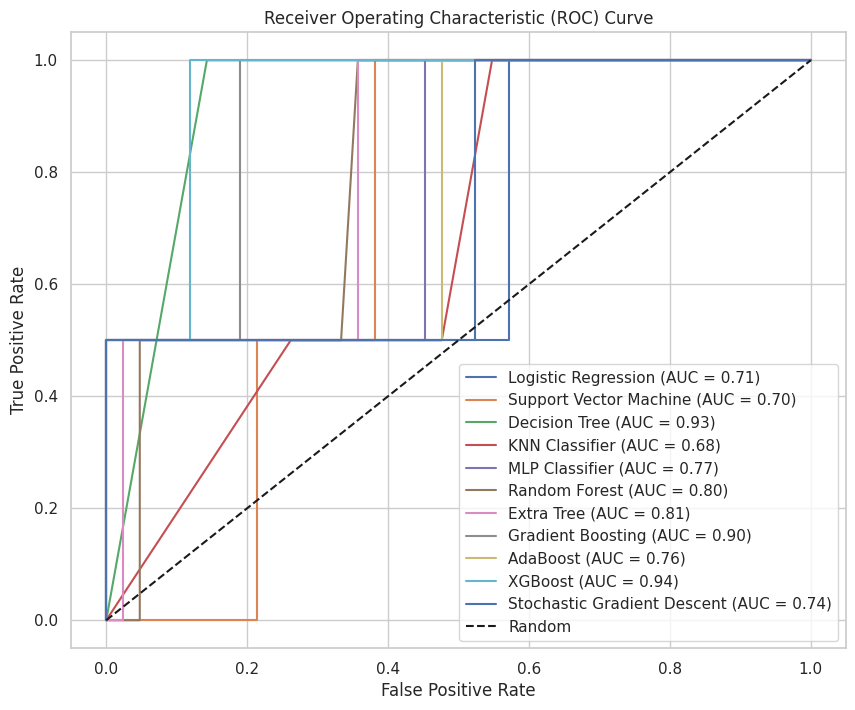

In [ ]:
#tanha's part

from sklearn.metrics import roc_curve, auc

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN Classifier': KNeighborsClassifier(),
    'MLP Classifier': MLPClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Tree': ExtraTreesClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Stochastic Gradient Descent': SGDClassifier(loss='log', random_state=42)
}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Precision-Recall Curve

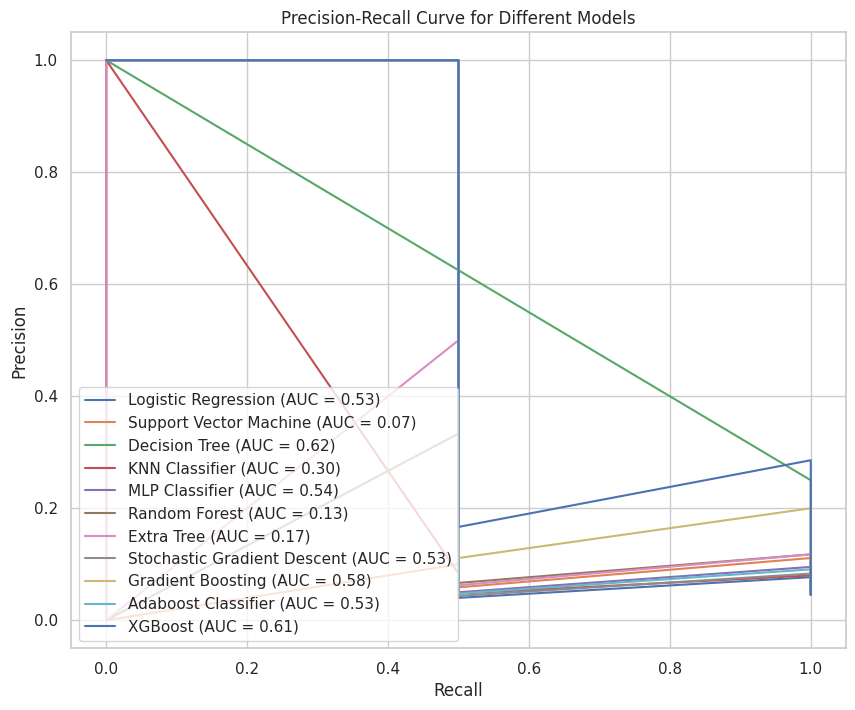

In [ ]:
#jishan's part

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN Classifier': KNeighborsClassifier(),
    'MLP Classifier': MLPClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Tree': ExtraTreesClassifier(random_state=42),
    'Stochastic Gradient Descent': SGDClassifier(loss='log', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Adaboost Classifier': AdaBoostClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
}

# Plot Precision-Recall Curve for each model
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Different Models')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

# Specify the desired number of components
n_components = 15

# Create PCA instance
pca = PCA(n_components=n_components)

# Fit PCA on the scaled training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Display the columns used for PCA
selected_columns_pca = X_train.columns[:n_components]
print("Columns used for PCA:", selected_columns_pca)

# Transform the test data using the same PCA
X_test_pca = pca.transform(X_test_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Display the shape after PCA
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)


Columns used for PCA: Index(['Age', 'GA', '            B/U', 'Gravida', 'Parity', 'Children Alive',
       'Past Obst Complications', 'Duration of Labour', 'Delivery method',
       'Perineum', 'Birth weight', 'Sex of Baby', 'HIV Status',
       'Abnormality_1 previous C/S', 'Abnormality_APH'],
      dtype='object')
Explained Variance Ratio: [0.1789956  0.15830681 0.09004125 0.06989695 0.05826926 0.04973851
 0.03924196 0.03216396 0.02722923 0.02157639 0.01940364 0.01729088
 0.01665482 0.01441757 0.01257881]
Shape of X_train_pca: (316, 15)
Shape of X_test_pca: (44, 15)


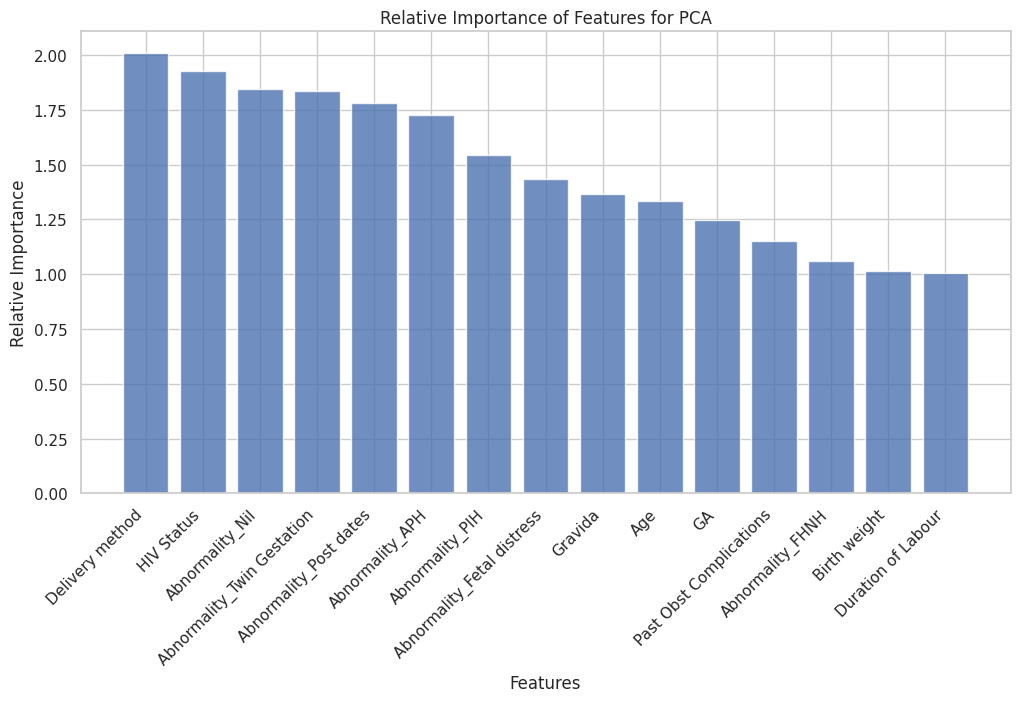

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on the combined dataset
pca.fit(X_combined)

# Get the absolute values of the PCA components for the selected columns
pca_components_abs = np.abs(pca.components_)

# Sum the absolute values across principal components to get relative importance
relative_importance = pca_components_abs.sum(axis=0)

# Get the indices of the top 15 features
top_features_indices = np.argsort(relative_importance)[::-1][:15]

# Get the names of the top 15 features
top_features_names = X_combined.columns[top_features_indices]

# Plotting the bar plot for relative importance
plt.figure(figsize=(12, 6))
plt.bar(top_features_names, relative_importance[top_features_indices], alpha=0.8)
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.title('Relative Importance of Features for PCA')
plt.xticks(rotation=45, ha='right')
plt.show()

